In [ ]:
## we need to run this every time
!pip install import-ipynb
import import_ipynb
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
'''
L_layered_NN file is imported, which has built in functions
'''
your_module = drive.CreateFile({'id':'170DxGP7AZFSeeyR3U8qpKIEPldNbJUe6'})
your_module.GetContentFile('L_layered_NN.ipynb')
import L_layered_NN as NN
#https://colab.research.google.com/drive/170DxGP7AZFSeeyR3U8qpKIEPldNbJUe6?usp=sharing
#https://colab.research.google.com/drive/170DxGP7AZFSeeyR3U8qpKIEPldNbJUe6?usp=sharing
#https://colab.research.google.com/drive/170DxGP7AZFSeeyR3U8qpKIEPldNbJUe6?usp=sharing

importing Jupyter notebook from L_layered_NN.ipynb


In [ ]:
import scipy.io
import pandas as pd
import numpy as np

data = scipy.io.loadmat('/content/drive/My Drive/ASSIGNMENT_2/data5.mat')
data1 = data['x']

In [ ]:
### in raw_data each column represent a different sample. There are 73 rows in this, last row represent output labels and remaining 72 rows
### are different features. There are 2148 columns meaning there are 2148 sample points.
raw_data = pd.DataFrame(data1.T)
### shuffling the data
shuffled_raw_data = raw_data.sample(frac = 1, random_state = 7, axis=1).reset_index(drop = True)
shuffled_raw_data.columns = list(range(raw_data.shape[1]))
shuffled_raw_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2108,2109,2110,2111,2112,2113,2114,2115,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142,2143,2144,2145,2146,2147
0,9099.953116,18545.804850,31221.136800,6045.378272,11386.552440,2468.029048,40585.112370,10144.683520,41038.504630,31822.221040,19925.187430,14069.625980,16683.410070,22520.057740,41315.970700,6113.170217,24931.096650,25994.024340,38249.789810,23866.593830,16107.264880,28075.543210,7047.109471,6070.891412,1179.567565,36860.232600,31750.789340,22102.103920,65635.577690,12096.310900,5508.673950,20152.433810,17100.588720,43693.261610,31008.997010,35598.746150,52945.225710,45030.438360,93306.034560,25419.605360,...,12533.848830,23178.576160,47975.671260,23477.648680,26171.719110,56006.673620,14437.678950,11996.806540,24213.345070,39760.503330,61682.074970,14833.860000,34429.205460,5000.548119,39572.957130,16617.980730,42572.772250,7566.007893,22534.137970,8707.592580,16632.387970,10325.524880,24823.144510,23283.335880,2370.842746,4357.666674,73693.359590,15838.636600,28946.536940,29974.754790,11955.089390,20224.746840,63761.223360,22276.943330,45450.381960,6796.516312,19811.680390,29283.205920,20215.280930,29142.509520
1,34419.448400,25605.492620,33857.898070,14044.801660,80965.113360,3295.677982,22404.359950,18163.662100,29168.533160,53395.171980,48069.733800,76578.703300,287500.841000,3754.443578,137846.880300,12865.763040,26805.664600,19158.029030,48430.817180,20559.113060,44003.807150,32394.208550,29863.088540,28529.163660,48955.236960,72655.327310,32936.267210,12550.863520,28070.771040,28241.353520,9015.150641,7801.354110,26930.673900,24504.110340,18229.446670,30666.065630,166704.868300,38689.096280,221806.030400,62974.090330,...,19440.199430,27568.521840,127115.418600,15900.476540,40546.016970,62573.914430,16642.457500,278424.182400,4866.320277,8310.973432,16321.713990,50625.023910,39857.276670,24913.796150,80483.075600,28442.626590,8486.314744,73459.153720,49413.721970,28964.725520,19414.312160,20329.308040,19004.234160,16942.109470,5373.603683,25050.588230,31628.537310,4539.945699,58797.840730,13121.141440,41633.102560,8394.099590,61662.241650,57471.372310,172426.543100,21456.627700,9095.749423,25639.635730,22626.776280,27918.902060
2,12591.255480,1668.275131,23264.267890,2527.740590,42101.232220,6675.408924,7666.949916,22084.831070,8404.194211,7228.038964,9851.947712,42135.099340,319101.053600,18858.004360,211014.082200,5630.895972,640.289972,68733.952240,40815.518570,20228.289610,43033.539760,45772.032120,51884.787460,9723.199147,37160.065200,15237.973810,3150.429313,23541.407660,19747.678450,26470.212700,5902.318618,15639.208950,56772.725660,4087.749660,44187.544390,343.908104,237975.910800,5445.026312,149647.966400,27588.450400,...,4459.485119,589.331937,187450.876800,52700.870180,13352.080280,10746.588220,2556.498637,258105.067400,24870.067380,48774.080840,42893.340560,11953.976030,19447.296320,12235.309300,10238.516260,7332.083110,16001.831310,50169.544900,5414.445016,7306.976362,5889.043570,31693.914300,30450.262770,35081.073090,705.997749,14893.790160,33054.896100,13985.761130,9516.354835,8479.313070,20935.185850,16671.576880,9501.053956,70742.957400,44271.891250,7195.320432,10838.061950,3921.840447,38847.549880,1169.222279
3,18620.637120,21654.124980,26745.169910,9413.666310,35655.300420,1212.129428,29570.949680,8628.528354,32991.572690,40799.576310,31530.953590,34795.919750,72326.385480,8417.519040,36873.269790,8084.788568,25707.753240,5427.835545,33137.027910,17133.753100,19313.089240,18782.629410,5493.877003,14870.318230,15696.453870,50934.129770,31560.107560,11442.457380,41921.022070,13579.036180,5789.098745,10069.580950,7798.507501,33141.578740,13567.869690,33048.431450,50391.826670,40508.209340,120133.630800,37306.872510,...,14875.343490,25174.592810,40745.438040,6500.680790,30020.984150,56648.1983

In [ ]:
#### separating input data and output labels
X = shuffled_raw_data.iloc[:-1, :]
Y = shuffled_raw_data.iloc[-1:, :].reset_index(drop=True)
print("shape of X is: ", X.shape)
print("shape of Y is: ", Y.shape)

shape of X is:  (72, 2148)
shape of Y is:  (1, 2148)


In [ ]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = NN.split(X, Y, val_split=0.1, test_split=0.2)
print("X_train shape is: ", X_train.shape)
print("Y_train shape is: ", Y_train.shape)
print("X_val shape is: ", X_val.shape)
print("Y_val shape is: ", Y_val.shape)
print("X_test shape is: ", X_test.shape)
print("Y_test shape is: ", Y_test.shape)

X_train shape is:  (72, 1503)
Y_train shape is:  (1, 1503)
X_val shape is:  (72, 214)
Y_val shape is:  (1, 214)
X_test shape is:  (72, 431)
Y_test shape is:  (1, 431)


In [ ]:
### min and max values of features of X
min_X_train_feat = list(X_train.min(axis=1))
max_X_train_feat = list(X_train.max(axis=1))

In [ ]:
### normalising X_train, X_val and X_test
X_train_norm = NN.normalize(X_train, min_X_train_feat, max_X_train_feat)
X_val_norm = NN.normalize(X_val, min_X_train_feat, max_X_train_feat)
X_test_norm = NN.normalize(X_test, min_X_train_feat, max_X_train_feat)

In [ ]:
X_train_norm.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502
0,0.035925,0.074277,0.125741,0.023523,0.045209,0.008999,0.163761,0.040167,0.165602,0.128182,0.079878,0.056103,0.066716,0.090413,0.166728,0.023798,0.100203,0.104518,0.154279,0.095881,0.064376,0.112970,0.027590,0.023627,0.003767,0.148637,0.127892,0.088716,0.265470,0.048091,0.021344,0.080800,0.068409,0.176380,0.124880,0.143515,0.213945,0.181809,0.377817,0.102186,...,0.040669,0.141707,0.026389,0.120553,0.042059,0.026432,0.024170,0.107185,0.057409,0.834607,0.064158,0.010307,0.026734,0.126481,0.075730,0.143942,0.258161,0.153032,0.061925,0.074179,0.207158,0.089564,0.058264,0.201575,0.068773,0.173835,0.023471,0.005832,0.035692,0.012158,0.049930,0.084099,0.100620,0.114351,0.047038,0.058173,0.130542,0.130112,0.013481,0.200336
1,0.005597,0.004151,0.005505,0.002255,0.013231,0.000492,0.003626,0.002931,0.004736,0.008709,0.007836,0.012511,0.047104,0.000568,0.022560,0.002062,0.004348,0.003094,0.007895,0.003324,0.007169,0.005265,0.004850,0.004631,0.007981,0.011868,0.005354,0.002010,0.004556,0.004584,0.001430,0.001231,0.004369,0.003971,0.002942,0.004981,0.027293,0.006297,0.036330,0.010280,...,0.003252,0.013530,0.003306,0.012418,0.004206,0.007423,0.004509,0.004722,0.003821,0.056140,0.004763,0.000031,0.019991,0.009859,0.007585,0.001633,0.006482,0.019128,0.008492,0.007174,0.008079,0.001546,0.004742,0.002451,0.013702,0.005144,0.001832,0.000629,0.001633,0.000710,0.007252,0.001548,0.005568,0.009727,0.016804,0.000713,0.018401,0.001930,0.003699,0.004579
2,0.001739,0.000193,0.003250,0.000314,0.005917,0.000901,0.001042,0.003083,0.001146,0.000980,0.001351,0.005922,0.045136,0.002626,0.029832,0.000754,0.000047,0.009688,0.005735,0.002820,0.006049,0.006437,0.007302,0.001333,0.005218,0.002114,0.000402,0.003289,0.002752,0.003704,0.000792,0.002171,0.007994,0.000535,0.006213,0.000005,0.033650,0.000727,0.021144,0.003862,...,0.000496,0.003088,0.001540,0.004342,0.000735,0.006427,0.001241,0.000551,0.007818,0.050346,0.003339,0.000336,0.016411,0.001386,0.000961,0.001479,0.002787,0.022029,0.001666,0.001321,0.000210,0.000722,0.007340,0.001900,0.012370,0.003803,0.000414,0.000735,0.001201,0.000545,0.001462,0.004079,0.005962,0.002441,0.010842,0.001154,0.005884,0.001292,0.002057,0.000592
3,0.013686,0.015952,0.019757,0.006806,0.026415,0.000677,0.021868,0.006219,0.024424,0.030259,0.023333,0.025772,0.053817,0.006062,0.027325,0.005813,0.018981,0.003828,0.024533,0.012575,0.014203,0.013807,0.003877,0.010883,0.011501,0.037832,0.023355,0.008322,0.031097,0.009918,0.004098,0.007296,0.005599,0.024536,0.009910,0.024467,0.037426,0.030041,0.089540,0.027649,...,0.010407,0.039680,0.007847,0.033569,0.012404,0.010742,0.010718,0.019846,0.003580,0.138227,0.012252,0.000492,0.026225,0.032219,0.022897,0.014881,0.034772,0.028534,0.022762,0.021349,0.037067,0.010727,0.006392,0.021534,0.021120,0.022612,0.005713,0.000919,0.005363,0.001935,0.019100,0.005811,0.014019,0.029331,0.028246,0.005373,0.046078,0.014572,0.006873,0.028051
4,0.001071,0.001770,0.009111,0.000364,0.003141,0.001798,0.008974,0.005601,0.008426,0.002980,0.001384,0.004329,0.046566,0.009563,0.044469,0.001276,0.002939,0.020639,0.013283,0.008185,0.008976,0.013975,0.010640,0.000357,0.003348,0.003835,0.004460,0.009532,0.017265,0.005910,0.001663,0.007721,0.014660,0.008632,0.015980,0.004977,0.050338,0.007540,0.032014,0.005190,...,0.000967,0.003860,0.001862,0.005547,0.000753,0.007185,0.000322,0.003932,0.014080,0.094671,0.006139,0.001255,0.014999,0.002702,0.000646,0.010010,0.015480,0.032832,0.000363,0.001473,0.006839,0.005525,0.012631,0.013563,0.015244,0.013179,0.000852,0.001221,0.003083,0.001208,0.000213,0.010947,0.012177,0.003909,0.009053,0.005000,0.004362,0.008649,0.001680,0.009706
5,0.003181,0.001314,0.003108,0.000975,0.008899,0.000608

In [ ]:
### converting dataframe to numpy array to obtain trained parameters
X_train_norm_arr = X_train_norm.to_numpy()
Y_train_arr = Y_train.to_numpy()

In [ ]:
#### sigmoid function
def sigmoid(Z):
  '''
  Z: input of any shape
  returns: sigmoid of input
  '''
  A = 1/(1 + np.exp(-Z))
  return A

In [ ]:
def model(X, Y, dims, seed, learning_rate = 0.01, epochs = 1000):
  '''
  X and Y: normalised input and output data
  dims: list containing number of neurons for each layer (including input layer)
  seed: to always initialize parameters with same rendom value
  learning_rate: learning_rate of gradient descent
  epochs: number of iterations

  returns:
  parameters: trained parameters
  caches: forward propagation parameters ---- ((A_prev, W, b), (Z)) for every layer
  '''
  costs = []
  parameters = NN.initialize_params(dims, seed)

  for i in range(epochs):
    AL, caches = NN.l_layer_forward(X, parameters)
    cost = NN.compute_cost(AL, Y)
    costs.append(cost)
    gradients = NN.l_layer_backward(AL, Y, caches)
    parameters = NN.update_params(parameters, gradients, learning_rate)

  return parameters, caches

In [ ]:
'''
Training first autoencoder (input layer, hidden layer, output layer)
number of neurons in each layer is: (input --- X_train.shape[0] ---- 72
                                     hidden ------------------------ 36
                                     output --- X_train.shape[0] ----72)
'''
n_input = X_train.shape[0]
n_H1 = n_input//2
autoenc_1_dims = [n_input, n_H1, n_input]
param_autoenc_1, caches_autoenc_1 = model(X_train_norm_arr, X_train_norm_arr, dims = autoenc_1_dims, seed = 4,learning_rate = 0.075, epochs = 700)

In [ ]:
'''
Z1: Hidden layer output from autoencoder 1, before applying activation, because l_layer_forward function in L_layered_NN notebook has relu activation
    for L-1 layers. So for this hidden layer, activation is relu.
    Shape of Z1 ---- (num_hidden_layer_neurons, num_training_examples) ====> (36, 1503)[for this example]
    
    We take Z1 and apply sigmoid activation
    Ouput after applying sigmoid activation should be input of autoencoder 2 
    Same thing should be repeated for autoencoders 2 and 3
'''
Z1 = caches_autoenc_1[0][1]
H1 = sigmoid(Z1)
print("shape of H1 is: ", H1.shape)
#print("H1 is: ")
#print(H1)

shape of H1 is:  (36, 1503)


In [ ]:
'''
Training second autoencoder ---- (input_layer, hidden_layer_2, output_layer)
number of neurons in each layer is --- (input_layer ----- 36
                                        hidden_layer_2 ----- 18
                                        output_layer ----- 36)
'''
n_H2 = n_H1//2
autoenc_2_dims = [n_H1, n_H2, n_H1]
param_autoenc_2, caches_autoenc_2 = model(H1, H1, dims = autoenc_2_dims, seed = 5, learning_rate = 0.05, epochs = 700)

In [ ]:
'''
Z2: Hidden layer output from autoencoder 2 of shape (num_neurons_in_H2, num_training_examples) ===> (18, 1503)[for this example]
    We take Z2 and apply sigmoid activation
    Ouput after applying sigmoid activation should be input of autoencoder 3
'''
Z2 = caches_autoenc_2[0][1]
H2 = sigmoid(Z2)
print("shape of H2 is: ", H2.shape)
#print("H2 is: ")
#print(H2)

shape of H2 is:  (18, 1503)


In [ ]:
'''
Training third autoencoder ---- (input_layer, hidden_layer_3, output_layer)
number of neurons in each layer is --- (input_layer ----- 18
                                        hidden_layer_3 ----- 9
                                        output_layer ----- 18)
'''
n_H3 = n_H2//2
autoenc_3_dims = [n_H2, n_H3, n_H2]
param_autoenc_3, caches_autoenc_3 = model(H2, H2, dims = autoenc_3_dims, seed = 6, learning_rate = 0.08, epochs = 700)

In [ ]:
'''
Z3: Hidden layer output from autoencoder 3 of shape (num_neurons_in_H3, num_training_examples) ===> (9, 1503)[for this example]
    We take Z3 and apply sigmoid activation
'''
Z3 = caches_autoenc_3[0][1]
H3 = sigmoid(Z3)
print("shape of H3 is: ", H3.shape)
#print("H3 is: ")
#print(H3)

shape of H3 is:  (9, 1503)


In [ ]:
print("keys of param_autoenc_1 is: ", param_autoenc_1.keys())
print("keys of param_autoenc_2 is: ", param_autoenc_2.keys())
print("keys of param_autoenc_3 is: ", param_autoenc_3.keys())

keys of param_autoenc_1 is:  dict_keys(['W1', 'b1', 'W2', 'b2'])
keys of param_autoenc_2 is:  dict_keys(['W1', 'b1', 'W2', 'b2'])
keys of param_autoenc_3 is:  dict_keys(['W1', 'b1', 'W2', 'b2'])


In [ ]:
'''
We now have a initialized values of parameters for our NN
We take W1 and b1 from all 3 dictionaries and store them in a new dictionary
'''
### storing values corrosponding to keys(W1 and b1)
W1 = param_autoenc_1['W1']
b1 = param_autoenc_1['b1']
W2 = param_autoenc_2['W1']
b2 = param_autoenc_2['b1']
W3 = param_autoenc_3['W1']
b3 = param_autoenc_3['b1']

In [ ]:
### new dictionary
new_param = {'W1': W1, 'b1':b1, 'W2':W2, 'b2':b2, 'W3':W3, 'b3': b3}

In [ ]:
'''
Now our NN has one input layer, 3 hidden layers and one output layer
Weights and biases for 3 hidden layers are obtained from 3 autoencoders and stored in new_param dictionary
For the output layer, we need to initialize weights and biases
Output layer has only 1 neuron, so W4 is of shape(1,9) and b4 is of shape (1,1)
'''
param_output_layer = NN.initialize_params([n_H3, 1], seed = 7)    ### initialising parameters for output layer
print("keys of param_output layer is: ", param_output_layer.keys()) ### printing its keys
W4 = param_output_layer['W1']                                        ### storing its weights and bias in W4 and b4
b4 = param_output_layer['b1']
new_param['W4'] = W4                                               ### adding W4 and b4 keys to new_param dictionary
new_param['b4'] = b4
print("keys of new_param dict is: ", new_param.keys())

keys of param_output layer is:  dict_keys(['W1', 'b1'])
keys of new_param dict is:  dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3', 'W4', 'b4'])


In [ ]:
def new_model(X, Y, params, learning_rate = 0.01, epochs = 1000):
  '''
  X and Y: normalised input and output data
  params: pre trained parameters
  learning_rate: learning_rate of gradient descent
  epochs: number of iterations

  returns:
  parameters: trained parameters
  caches: forward propagation parameters ---- ((A_prev, W, b), (Z)) for every layer
  '''
  costs = []
  parameters = params

  for i in range(epochs):
    AL, caches = NN.l_layer_forward(X, parameters)
    cost = NN.compute_cost(AL, Y)
    costs.append(cost)
    gradients = NN.l_layer_backward(AL, Y, caches)
    parameters = NN.update_params(parameters, gradients, learning_rate)

  return parameters, caches

In [ ]:
### training stacked autoencoder
trained_param, caches1 = new_model(X_train_norm_arr, Y_train_arr, params = new_param, learning_rate=0.08, epochs = 650)

In [ ]:
print("trained_param keys are: ", trained_param.keys())

trained_param keys are:  dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3', 'W4', 'b4'])


In [ ]:
### predicting labels for validation set
Y_pred = NN.predict(X_val_norm, Y_val, trained_param)

In [ ]:
### confusion matrix for validation set
conf_mat = NN.confusion_matrix(Y_val.T, Y_pred.T)
conf_mat

Predicted,0.0,1.0
Actual,,
0.0,87,23
1.0,12,92


In [ ]:
### performance measure for validation set
acc_val, speci_val, sensi_val = NN.performance_measure(conf_mat)
print("Accuracy is: %f" %(acc_val*100)+' %')
print("Specificity is: %f" %(speci_val*100)+' %')
print("Sensitivity is: %f" %(sensi_val*100)+' %')

Accuracy is: 83.644860 %
Specificity is: 87.878788 %
Sensitivity is: 80.000000 %


In [ ]:
### predicting output labels for test set
Y_pred_test = NN.predict(X_test_norm, Y_test, trained_param)

In [ ]:
### confusion matrix for test set
conf_mat_test = NN.confusion_matrix(Y_test.T, Y_pred_test.T)
conf_mat_test

Predicted,0.0,1.0
Actual,,
0.0,179,29
1.0,27,196


In [ ]:
### performance measure for test set
acc_test, speci_test, sensi_test = NN.performance_measure(conf_mat_test)
print("Accuracy is: %f" %(acc_test*100)+' %')
print("Specificity is: %f" %(speci_test*100)+' %')
print("Sensitivity is: %f" %(sensi_test*100)+' %')

Accuracy is: 87.006961 %
Specificity is: 86.893204 %
Sensitivity is: 87.111111 %


In [ ]:
##### OPTIONAL CODE #####
'''
Plots of accuracy vs learning_rate for different epochs
'''
import matplotlib.pyplot as plt

In [ ]:
def accuracy(Y_act, Y_pred):
  tp = tn = fn = fp = 0
  for i in range(len(Y_act)):
    if(Y_act.iloc[i,0] == 0.0):
      if(Y_pred.iloc[i,0] == 0.0):
        tp = tp + 1
      else:
        fn = fn + 1

    else:
      if(Y_pred.iloc[i,0] == 0.0):
        fp = fp + 1
      else:
        tn = tn + 1
  
  accuracy = (tp + tn)/len(Y_act)
  return accuracy

acc list for epoch 700 is: 
[0.8364485981308412, 0.8411214953271028, 0.8364485981308412, 0.8364485981308412, 0.8551401869158879, 0.8457943925233645, 0.8317757009345794, 0.8504672897196262]


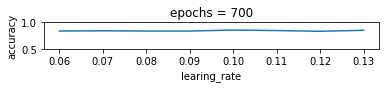

acc list for epoch 750 is: 
[0.8925233644859814, 0.883177570093458, 0.8878504672897196, 0.883177570093458, 0.8785046728971962, 0.8738317757009346, 0.8691588785046729, 0.8738317757009346]


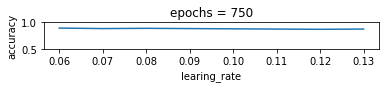

acc list for epoch 800 is: 
[0.8691588785046729, 0.8691588785046729, 0.8691588785046729, 0.8598130841121495, 0.8691588785046729, 0.8691588785046729, 0.8785046728971962, 0.8691588785046729]


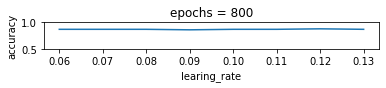

L_layered_NN.ipynb:9: RuntimeWarning: overflow encountered in exp
L_layered_NN.ipynb:13: RuntimeWarning: overflow encountered in exp


acc list for epoch 850 is: 
[0.8738317757009346, 0.8785046728971962, 0.8785046728971962, 0.6682242990654206, 0.5420560747663551, 0.7149532710280374, 0.514018691588785, 0.514018691588785]


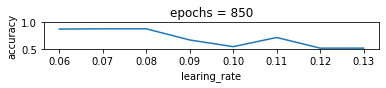

acc list for epoch 900 is: 
[0.514018691588785, 0.514018691588785, 0.514018691588785, 0.514018691588785, 0.514018691588785, 0.514018691588785, 0.514018691588785, 0.514018691588785]


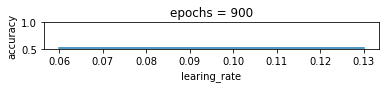

acc list for epoch 950 is: 
[0.514018691588785, 0.514018691588785, 0.514018691588785, 0.514018691588785, 0.514018691588785, 0.514018691588785, 0.514018691588785, 0.514018691588785]


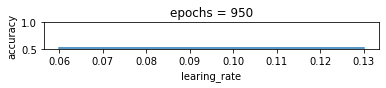

acc list for epoch 1000 is: 
[0.514018691588785, 0.514018691588785, 0.514018691588785, 0.514018691588785, 0.514018691588785, 0.514018691588785, 0.514018691588785, 0.514018691588785]


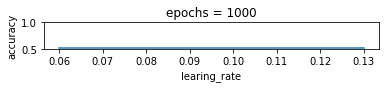

In [ ]:
'''
epoch_list: plots for epochs in range 700 - 1050 (700, 750, 800, 850, ....., 1000)
lr_list (learning_rate list)
'''
epoch_list = list(range(700, 1050, 50))
lr_list = [0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13]
for i in range(len(epoch_list)):
  acc_op = []
  for j in range(len(lr_list)):
    trained_param_optinal, caches_optional = new_model(X_train_norm_arr, Y_train_arr, params=new_param, 
                                                       learning_rate = lr_list[j], epochs = epoch_list[i])
    Y_pred_val = NN.predict(X_val_norm, Y_val, trained_param_optinal)
    acc = accuracy(Y_val.T, Y_pred_val.T)
    acc_op.append(acc)
  
  print("acc list for epoch "+str(epoch_list[i])+ " is: ")
  print(acc_op)
  plt.subplot(len(epoch_list), 1, 1)
  plt.xlabel('learing_rate')
  plt.ylabel('accuracy')
  plt.ylim(0.5, 1)
  plt.title('epochs = '+str(epoch_list[i]))
  plt.plot(lr_list, acc_op)
  plt.show()

